# Google Trends API

The following project is inspired by Sadrach Pierre and his article "Choosing a Halloween Costume Using the Google Trends API in Python". 

*Source*: https://towardsdatascience.com/choosing-a-halloween-costume-using-the-google-trends-api-in-python-a3206b78a2a2

Other helpful links: 
* https://pypi.org/project/pytrends/
* https://towardsdatascience.com/google-trends-api-for-python-a84bc25db88f
* https://www.oberlo.com/blog/google-trends

I try first steps with the API to lay the foundation for later projects by dealing with the basic functions. The notebook will be extended over time. 

One idea could be to identify trends in specific industries and how different keywords relate to each other.

## Imports

In [2]:
# Install pytrends
#!pip install pytrends

In [103]:
from pytrends.request import TrendReq
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set(rc={'figure.figsize':(15,6)})

In [104]:
pytrend = TrendReq(hl="de")

In [131]:
keywords = ["Corona Test", "Corona Warnung", "Corona Fake", "Corona", "Masken"]
pytrend.build_payload(keywords, cat=0, timeframe="today 5-y", geo='DE', gprop='')

In [132]:
# Transform to Pandas DataFrame
df = pytrend.interest_over_time()

## Quick Data Overview

In [133]:
df.head()

,Corona Test,Corona Warnung,Corona Fake,Corona,Masken,isPartial
date,,,,,,
2015-10-18,0,0,0,0,0,False
2015-10-25,0,0,0,0,0,False
2015-11-01,0,0,0,0,0,False
2015-11-08,0,0,0,0,0,False
2015-11-15,0,0,0,0,0,False


**What is the meaning of the numbers?** 

" *We index our data to 100, where 100 is the maximum search interest for the time and location selected.* "

Further reading: https://medium.com/google-news-lab/what-is-google-trends-data-and-what-does-it-mean-b48f07342ee8

## Data Preparation

In [134]:
# Transform date (the index) to pandas dateformat 
df['timestamp'] = df.index
df['timestamp'] = pd.to_datetime(df['timestamp'])

df['timestamp_year'] = df.timestamp.dt.year
df['timestamp_year_month'] = df.timestamp.dt.to_period('M')

In [135]:
# Defina a query for the date from 2020 till now 
year_2020 = df.query("timestamp >= 2020")
year_2020.head()

,Corona Test,Corona Warnung,Corona Fake,Corona,Masken,isPartial,timestamp,timestamp_year,timestamp_year_month
date,,,,,,,,,
2020-01-05,0,0,0,0,0,False,2020-01-05,2020,2020-01
2020-01-12,0,0,0,0,0,False,2020-01-12,2020,2020-01
2020-01-19,0,0,0,0,0,False,2020-01-19,2020,2020-01
2020-01-26,0,0,0,3,0,False,2020-01-26,2020,2020-01
2020-02-02,0,0,0,2,0,False,2020-02-02,2020,2020-02


## Data Visualization

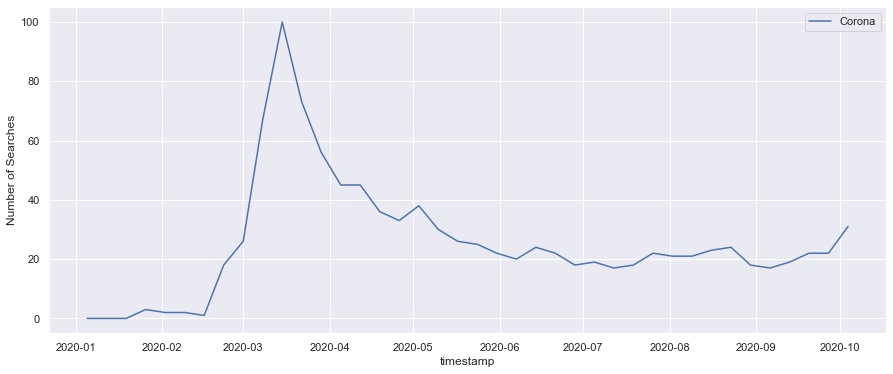

In [153]:
sns.lineplot(x=year_2020["timestamp"], y=year_2020["Corona"], label="Corona")
plt.ylabel("Number of Searches");

In [138]:
# Write a function to plot the different keywords 

def plot_kw(keyword):
    sns.lineplot(x=year_2020["timestamp"], y=year_2020[keyword], label=keyword)
    plt.ylabel("Number of Searches");

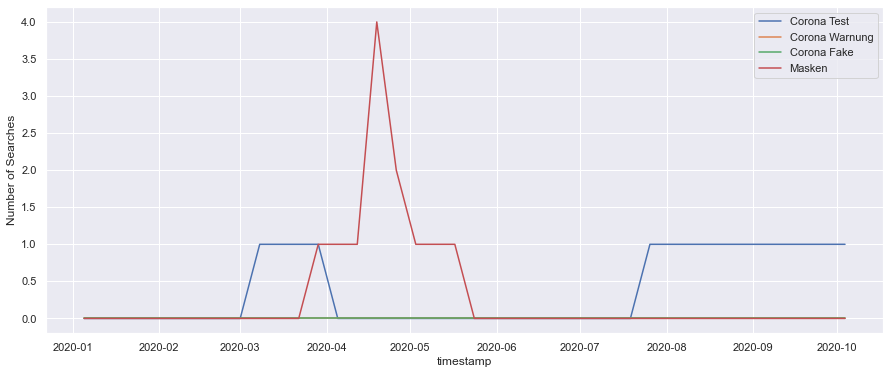

In [152]:
plot_kw("Corona Test")
plot_kw("Corona Warnung")
plot_kw("Corona Fake")
plot_kw("Masken")

---

**Top Charts**

There is a function that shows us the top charts (from Germany).

In [170]:
# Get Top 10 Charts from Google Trends (Germany & year 2019) 
df_trend = pytrend.top_charts(2019, hl='DE', tz=300, geo='DE')
df_trend.head(10)

,title,exploreQuery
0,Rebecca Reusch,
1,Notre Dame,
2,Handball WM,
3,Karl Lagerfeld,
4,Julen,
5,Europawahl,
6,Frauen WM,
7,30 Jahre Mauerfall,
8,Thomas Cook,
9,Greta Thunberg,


The documentation states that a specification is also possible over year and month. However, this does not seem to work at the moment, because an error occurs here. 

---

**Trending Searches**

In [173]:
# Trending searches in real time for Germany
pytrend.trending_searches(pn='germany')

,0
0,LeBron James
1,Dak Prescott
2,München Corona
3,Gal Gadot
4,Nadal
5,Babylon Berlin
6,Michael Schumacher
7,Amazon Prime Day
8,Suicide Squad
9,Corona NRW


---

**Google Keyword Suggestions**

Will flow.

---

**Related Queries** 

In [185]:
# Related Queries -> returns a dictionary of dataframes -> Top & Rising

# Update the build_payload to avoid timeout 
# pytrend.build_payload(['Coronavirus', "Corona"])
pytrend.build_payload(["Corona"])

related_queries = pytrend.related_queries()
related_queries.values()


dict_values([{'top':                     query  value
0      deutschland corona    100
1          corona aktuell     68
2           corona zahlen     59
3             corona news     40
4           corona bayern     39
5           bayern corona     38
6            corona virus     35
7              nrw corona     30
8            corona fälle     29
9                     rki     28
10             rki corona     28
11          corona berlin     24
12             corona usa     24
13             usa corona     24
14           corona karte     22
15         italien corona     21
16      fallzahlen corona     20
17            corona test     18
18        symptome corona     18
19   niedersachsen corona     17
20      corona infizierte     15
21          hessen corona     15
22         corona hamburg     15
23  corona in deutschland     15
24         corona sachsen     14, 'rising':                             query   value
0                   corona zahlen  523100
1                    coron

**Related Topics** 

In [176]:
related_topic = pytrend.related_topics()
related_topic.values()

dict_values([])

---

**Suggestions**

Will follow.

---

**Categories**

Will follow.

---

**Interest by Region**

Will follow.